# Question 1
### I. Implement the KNN regressor function

In [1]:
# load training and test dataset into dataframe
train <- read.csv(file="Task1A_train.csv", header=TRUE, sep=",")
test <- read.csv(file="Task1A_test.csv", header=TRUE, sep=",")
head(train)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


In [2]:
head(test)

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [3]:
# Seperate predictors and target variables for training and test set
train.data <- train[,-2, drop = FALSE]
train.label <- train[,2, drop = FALSE]

test.data <- test[,-2, drop = FALSE]
test.label <- test[,2, drop = FALSE]

The following code is adapted from tutorial, the only difference is the target value is the mean of the nearest neighbours instead of the majority of labels.

In [4]:
### KNN Regressor

knn <- function(train.data, train.label, test.data, K=4){
    
    # create a empty vector to hold the result
    result = c()
    
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### calculate regressed value
       result[i]<- mean(train.label[nn,])
    }
    
    ## return regressed value
    return (result)
}

### II. Plot the training and testing errors versus 1/K for K=1,...20.

In [5]:
# calculate the train and test missclassification rates for K in 1:100 
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    # calculate prediction value for training set
    train_pred <- knn(train.data, train.label, train.data, K=k)
    # calculate prediction value for test set
    test_pred <- knn(train.data, train.label, test.data, K=k)
    
    miss[k,'train'] <- sum((train.label - train_pred)^2)/nrow(train.data)
    miss[k,'test'] <- sum((test.label - test_pred)^2)/nrow(test.data)
}

Since this is a regression task, the mean squared error would be an appropriate error function.

In [7]:
# reshape dataframe for plotting
library(reshape)
miss.m <- melt(miss, id='K')
names(miss.m) <- c('K', 'type', 'error')
head(miss.m)

K,type,error
1,train,0.00000000
2,train,0.12229226
3,train,0.09634101
4,train,0.14983810
5,train,0.15821952
6,train,0.28321620


Saving 6.67 x 6.67 in image


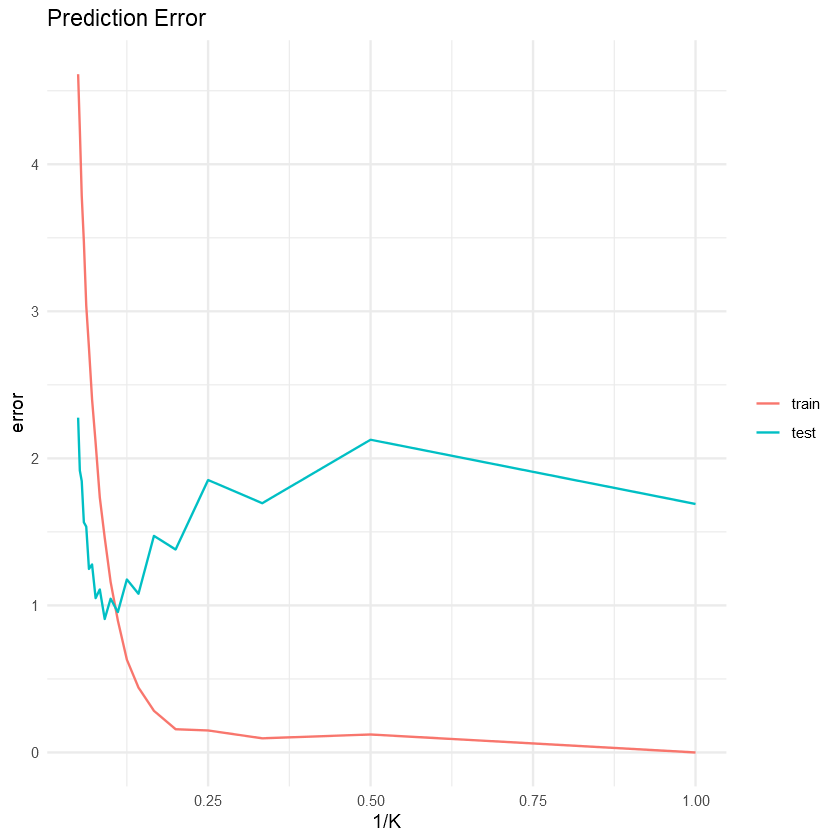

In [9]:
# import library
library(ggplot2)
library(reshape)

# plot prediction error for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Prediction Error")
# save plot
ggsave('Q1_plot.jpg')

### III. Report the optimum value of K in terms of testing error. Discuss the values of K corresponding to underfitting and overfitting.

In [10]:
miss

K,train,test
1,0.00000000,1.6897238
2,0.12229226,2.1266708
3,0.09634101,1.6951299
4,0.14983810,1.8528619
5,0.15821952,1.3802052
6,0.28321620,1.4729574
7,0.44165671,1.0792730
8,0.63131202,1.1767515
9,0.89775229,0.9545830
10,1.15967988,1.0460454


The optimum value of K appears to be K = 11, this results in the lowest testing error of 0.9076418. As shown in the graph, for K = 12 to K = 20, there are obvious underfitting problems. For K = 1 to K = 10, overfitting occurs since the model fails to generalize.